### Importing Needed packages

In [1]:
import pandas as pd
import polars as pol
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing

### Read data

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Review and standardize data

In [3]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
for column in heart_df.columns:
    print("------  " + column + "  ------")
    print(heart_df[column].value_counts())

------  age  ------
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64
------  sex  ------
1    207
0     96
Name: sex, dtype: int64
------  cp  ------
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
------  trtbps  ------
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101 

In [5]:
heart_df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
heart_df['oldpeak'] = heart_df['oldpeak'].astype('int64')
heart_df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
oldpeak     int64
slp         int64
caa         int64
thall       int64
output      int64
dtype: object

### Training data

In [7]:
feature_df = heart_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
x = np.asanyarray(feature_df)
x[0:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   2,   0,   0,   1],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   3,   0,   0,   2],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   1,   2,   0,   2],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0,   2,   0,   2],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0,   2,   0,   2]],
      dtype=int64)

In [8]:
y = np.asanyarray(heart_df['output'])
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


### Models for find best

#### Logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear')
LR = LR.fit(x_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [11]:
y_hat_LR = LR.predict(x_test)
print(y_hat_LR)
print(y_test)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


##### LogisticRegression Evaluation 

###### jaccard_score

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat_LR, pos_label=0)

0.5925925925925926

###### log_loss

In [13]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_LR)

6.499675201316208

###### f1_score

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat_LR))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.79      0.94      0.86        36

    accuracy                           0.82        61
   macro avg       0.84      0.79      0.80        61
weighted avg       0.83      0.82      0.81        61



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[34  2]
 [ 9 16]]


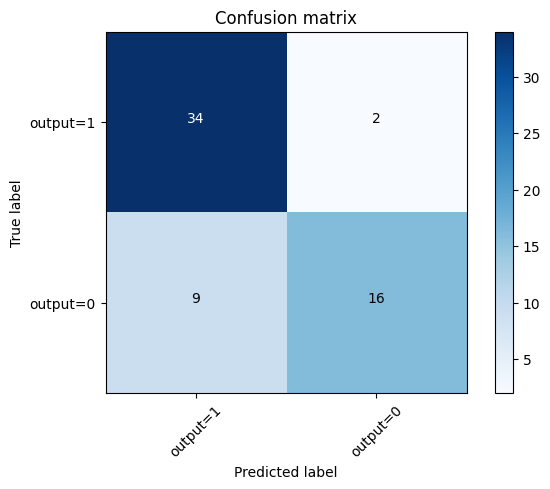

In [17]:
cnf_matrix = confusion_matrix(y_test, y_hat_LR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

#### DecisionTree model

In [18]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
predTree = drugTree.predict(x_test)

In [21]:
print(predTree[0:5])
print(y_test[0:5])

[0 0 1 1 1]
[1 0 1 1 0]


##### Decision Trees Evaluation

In [22]:
from sklearn import metrics
print('Decision Trees Accuracy: ', metrics.accuracy_score(y_test, predTree))

Decision Trees Accuracy:  0.8524590163934426


###### jaccard_score

In [23]:
jaccard_score(y_test, predTree,pos_label=0)

0.6785714285714286

###### log_loss

In [24]:
log_loss(y_test, predTree)

5.31791607380417

###### f1_score

In [25]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, predTree, labels=[1,0]))

[[33  3]
 [ 6 19]]


Confusion matrix, without normalization
[[33  3]
 [ 6 19]]


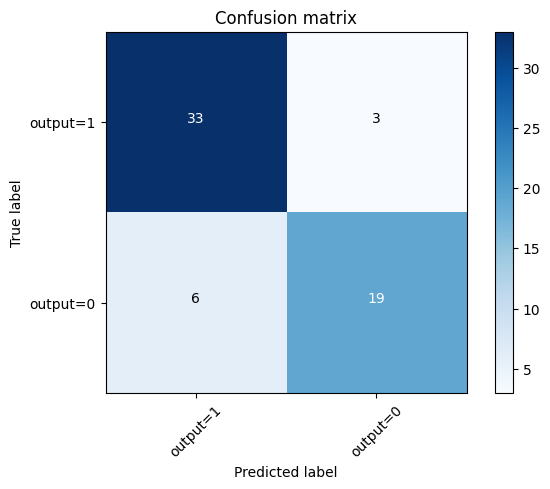

In [28]:
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

#### Support Vector Machines model

In [29]:
from sklearn import svm

##### SVC(kernel='linear')

In [30]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
y_hat_SVC = clf.predict(x_test)
print(y_test[:10])
print(y_hat_SVC[:10])

[1 0 1 1 0 0 0 1 1 1]
[1 0 1 1 1 0 0 1 1 1]


##### SVM Evaluation

###### jaccard_score

In [32]:
jaccard_score(y_test, y_hat_SVC, pos_label=0)

0.75

###### log_loss

In [33]:
log_loss(y_test, y_hat_SVC)

4.136156946292132

###### f1-score

In [34]:
print(classification_report(y_test, y_hat_SVC))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


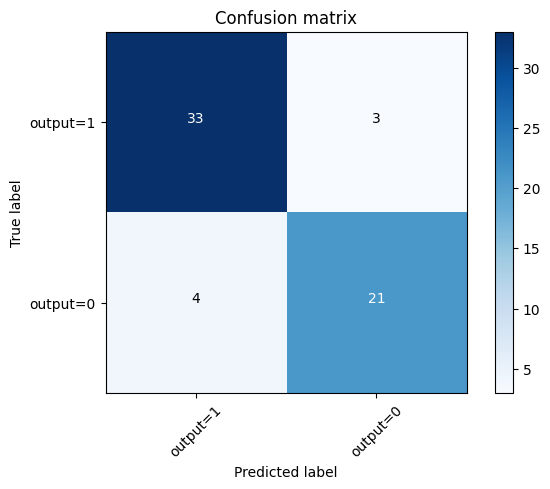

In [36]:
cnf_matrix = confusion_matrix(y_test, y_hat_SVC, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')